[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ietheredge/ASAB-2019-MLWS/blob/master/2-UnsupervisedApprocahes-MLWS-ASAB2019-MPIAB.ipynb)

In [1]:
import sys
!{sys.executable} -m pip install --upgrade git+https://www.github.com/jgraving/behavelet.git
!{sys.executable} -m pip install --upgrade numpy
!{sys.executable} -m pip install --upgrade scipy
!{sys.executable} -m pip install --upgrade umap
!{sys.executable} -m pip install --upgrade pandas
!{sys.executable} -m pip install --upgrade scikit-learn

  Cloning https://www.github.com/jgraving/behavelet.git to /tmp/pip-req-build-x66_e90z
  Running setup.py bdist_wheel for behavelet ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-gisso9fa/wheels/01/49/6a/5fc7f66bdfe5ea597bac908e9d97f772dd88f14add4f8caf9c
Successfully built behavelet
Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/ngwena-ian/miniconda3/envs/models/lib/python3.6/site-packages/pandas-0.24.2.dist-info/METADATA'

    100% |████████████████████████████████| 20.4MB 2.5MB/s eta 0:00:011
Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/ngwena-ian/miniconda3/envs/models/lib/python3.6/site-packages/pandas-0.24.2.dist-info/METADATA'

    100% |████████████████████████████████| 25.2MB 2.4MB/s eta 0:00:011
Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/ngwena-ian/miniconda3/envs/models/lib/python3.6/site-packages/pandas-

In [3]:
from behavelet import wavelet_transform

/home/ngwena-ian/miniconda3/envs/models/lib/python3.6/site-packages/behavelet/morlet.py:26: UserWarning: CuPy was not found, so GPU functionality is unavailable
  warnings.warn('CuPy was not found, so GPU functionality is unavailable')


In [4]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy import linalg as LA
import umap
from scipy import ndimage

In [5]:
file_name = 'time_series.npy'
DATA_DIR = 'data/'
OUTPUT_DIR = 'output/'
data_file = os.path.join(DATA_DIR, file_name)

In [8]:
arr = np.load(data_file).T

In [9]:
arr.shape

(6, 456177)

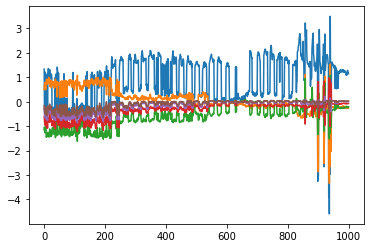

In [10]:
plt.plot(arr[:,:1000].T)

In [ ]:
freqencies, power, wavelet_transform = wavelet_transform(X=arr.T, n_freqs=25, fsample=35, fmin=1., fmax=15., n_jobs=-1)

In [ ]:
plt.figure(figsize=(20,25))
plt.imshow(wavelet_transform[0:1000].T)

In [ ]:
reducer = umap.UMAP(metric='manhattan')

In [ ]:
random_indices = np.random.choice(len(wavelet_transform), 50000)
embedding = reducer.fit_transform(wavelet_transform[random_indices])

In [ ]:
H, XE, YE = np.histogram2d(embedding[:,0], embedding[:,1], bins=120)
H = ndimage.filters.gaussian_filter(H, sigma=2)
plt.imshow(H, cmap='viridis')

In [ ]:
X = PCA(n_components=15).fit_transform(wavelet_transform)
X.shape

In [ ]:
k=6
gmm = GaussianMixture(n_components=k, covariance_type='diag', max_iter=1000)
gmm.fit(X)
GMM_posterior_labels = gmm.predict(X)
GMM_posterior_probas = gmm.predict_proba(X)
GMM_PCA_LABELS = np.expand_dims(np.asarray(GMM_posterior_labels),axis=1)
GMM_PCA_PROBAS = np.asarray(GMM_posterior_probas)

In [ ]:
labels = np.expand_dims(GMM_posterior_labels,axis=0)
plt.pcolormesh(labels,cmap='rainbow')

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(211)
plt.imshow(wavelet_transform[7000:7100, :])
plt.pcolormesh(GMM_PCA_LABELS[7000:7100],cmap='rainbow')
plt.subplot(212)
plt.plot(arr[7000:7100, :])
plt.xlim(7000,7100)